In [1]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=e1dcc2f164e3295ab4c42c4ee80d7dcfb6e72b2de97ac06fe168353fc3b70340
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [2]:
pip install wordcloud

In [3]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 5.1 MB/s eta 0:00:00


In [4]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 9.3 MB/s eta 0:00:00


In [5]:
!pip install nltk

In [6]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.8 MB/s eta 0:00:00


In [8]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from nltk.corpus import stopwords
from collections import Counter
import string
import re
import seaborn as sns
#from tqdm import tqdm
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
# Transformers library for BERT
import transformers
from transformers import BertModel
from transformers import BertTokenizer
from transformers import AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from langdetect import detect, LangDetectException
import contractions
from nltk.tokenize import word_tokenize
import emoji

# Tokenization for LSTM
from collections import Counter

#WordCloud
from wordcloud import WordCloud


In [9]:
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth', 100)

In [10]:
# Set seed for reproducibility
import random
seed_value = 7070
random.seed(seed_value)
np.random.seed(seed_value)

In [11]:
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
    torch.cuda.manual_seed_all(seed_value)
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")
    torch.manual_seed(seed_value)

GPU is available


# Load the Dataset

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
# load the data
df = pd.read_excel('/content/drive/My Drive/Aneesha/modified_excel_file.xlsx', header=0)

# EDA

In this section, we will try to explore and extract insights from the data.

In [14]:
df.head()

,position,title,tags,Label,highlighs,link,displayed_link,sitelinks,tweets_final
0,0,സന്തോഷം നിറഞ്ഞ ശുഭദിനം,"Nov 13, 2019 —",p,['സന്തോഷം'],https://twitter.com/abijthaji/status/1194418358067712000,https://twitter.com › abijthaji › status,"{'inline': [{'title': 'Translate this page', 'link': 'https://translate.google.com/translate?hl=...",ചിലപ്പോഴൊക്കെ ചെറിയ ചെറിയ ചില നിമിഷങ്ങളിൽ ഒരുപാട് സന്തോഷം അടങ്ങിയിട്ടുണ്ടാകും
1,1,Kerala United,"Aug 29, 2023 —",p,['സന്തോഷം'],https://twitter.com/KeralaUnitedFC/status/1696384639852765644,https://twitter.com › status,"{'inline': [{'title': 'Translate this page', 'link': 'https://translate.google.com/translate?hl=...",നല്ല വാർത്ത അറിയിച്ചതിൽ സന്തോഷം
2,2,Narendra Modi,"Aug 29, 2023 —",p,['സന്തോഷം'],https://twitter.com/narendramodi/status/1696355161952985294,https://twitter.com › status,"{'inline': [{'title': 'Translate this page', 'link': 'https://translate.google.com/translate?hl=...",നിയമനിർമ്മാണത്തിലെ ചരിത്രപരമായ ഏട്; പിന്തുണച്ച എംപിമാർക്ക് നന്ദി; നാരീ ശക്തി വന്ദൻ അധിനിയം പാസാക...
3,0,സന്തോഷം നിറഞ്ഞ ശുഭദിനം,"Nov 13, 2019 —",p,['സന്തോഷം'],https://twitter.com/abijthaji/status/1194418358067712000,https://twitter.com › abijthaji › status,"{'inline': [{'title': 'Translate this page', 'link': 'https://translate.google.com/translate?hl=...",സന്തോഷം നിറഞ്ഞ ശുഭദിനം
4,1,Kerala United,"Aug 29, 2023 —",p,['സന്തോഷം'],https://twitter.com/KeralaUnitedFC/status/1696384639852765644,https://twitter.com › status,"{'inline': [{'title': 'Translate this page', 'link': 'https://translate.google.com/translate?hl=...",ഏവർക്കും സന്തോഷം നിറഞ്ഞ തിരുവോണാശംസകൾ നേരുന്നു


In [15]:
df.tail()

,position,title,tags,Label,highlighs,link,displayed_link,sitelinks,tweets_final
1996,996,Jan-Malte,NaN,n,['നരകം'],https://twitter.com/janrxh1x/status/1409292162383159297?lang=ar-x-fm,https://twitter.com › status,"{'inline': [{'title': 'Translate this page', 'link': 'https://translate.google.com/translate?hl=...",തന്റെ പൂർവ്വികരുടെ പാപങ്ങൾക്ക് അവൻ പ്രതിഫലം നൽകേണ്ടിവരും. നരകം അവനുവേണ്ടി കാത്തിരിക്കുന്നു
1997,997,"ശ്രീ:മഹാകാമാനന്ദ😁 on X: ""സത്യസന്ധനായി ...","Jun 27, 2023 —",n,['നരകം'],https://twitter.com/kannettan3215/status/1673688207609982976,https://twitter.com › status,"{'inline': [{'title': 'Translate this page', 'link': 'https://translate.google.com/translate?hl=...",സത്യസന്ധനായി ജീവിച്ച് മരിച്ച ഒരാൾ സ്വർഗ്ഗത്തിലെ ബോറടി മാറ്റാൻ കാലനോട് നരകം കാണിച്ച് തരാൻ ആവശ്യപ്...
1998,998,Satish Viswanat,"Aug 12, 2023 —",n,['നരകം'],https://twitter.com/SatishViswanat/status/1690195191846535169,https://twitter.com › status,"{'inline': [{'title': 'Translate this page', 'link': 'https://translate.google.com/translate?hl=...",അതൊക്കെ അവിടെ നിൽക്കട്ടെ ഭൂമിയിൽ ഉള്ള ഒരു മനുഷ്യൻ ഭൂമിയിൽ തന്നെ മരിച്ചാൽ ആ മനുഷ്യൻ “സ്വർഗ്ഗം നരക...
1999,999,X \ നിശാഗന്ധി على X,NaN,n,['നരകം'],https://twitter.com/nishthvanth,https://twitter.com › nishthvanth,NaN,നല്ല നാരിയെ കിട്ടാതെ നരകം ആക്കുന്ന നാരിയെ കിട്ടി എട്ടിന്റെ പണി പതിനാറിലും മുപ്പത്തിരണ്ടിലും ഒക്ക...
2000,1000,تويتر \ Alkesh Ambily (AlkeshAmbily@),NaN,n,['നരകം'],https://twitter.com/kochumuthalalii?lang=ar-x-fm,https://twitter.com › kochumuthalalii,"{'inline': [{'title': 'Translate this page', 'link': 'https://translate.google.com/translate?hl=...",ക്ഷേത്രമാണ് ആനയുടെ നരകം. അത് തടഞ്ഞേ മതിയാവൂ ആനഡോക്ടർ


we will be eliminating unnecessary columns that don't provide meaningful information for sentiment analysis.

In [44]:
columns_to_keep = ["Label", "tweets_final"]
df = df[columns_to_keep]
df

,Label,tweets_final
0,p,ചിലപ്പോഴൊക്കെ ചെറിയ ചെറിയ ചില നിമിഷങ്ങളിൽ ഒരുപാട് സന്തോഷം അടങ്ങിയിട്ടുണ്ടാകും
1,p,നല്ല വാർത്ത അറിയിച്ചതിൽ സന്തോഷം
2,p,നിയമനിർമ്മാണത്തിലെ ചരിത്രപരമായ ഏട്; പിന്തുണച്ച എംപിമാർക്ക് നന്ദി; നാരീ ശക്തി വന്ദൻ അധിനിയം പാസാക...
3,p,സന്തോഷം നിറഞ്ഞ ശുഭദിനം
4,p,ഏവർക്കും സന്തോഷം നിറഞ്ഞ തിരുവോണാശംസകൾ നേരുന്നു
...,...,...
1996,n,തന്റെ പൂർവ്വികരുടെ പാപങ്ങൾക്ക് അവൻ പ്രതിഫലം നൽകേണ്ടിവരും. നരകം അവനുവേണ്ടി കാത്തിരിക്കുന്നു
1997,n,സത്യസന്ധനായി ജീവിച്ച് മരിച്ച ഒരാൾ സ്വർഗ്ഗത്തിലെ ബോറടി മാറ്റാൻ കാലനോട് നരകം കാണിച്ച് തരാൻ ആവശ്യപ്...
1998,n,അതൊക്കെ അവിടെ നിൽക്കട്ടെ ഭൂമിയിൽ ഉള്ള ഒരു മനുഷ്യൻ ഭൂമിയിൽ തന്നെ മരിച്ചാൽ ആ മനുഷ്യൻ “സ്വർഗ്ഗം നരക...
1999,n,നല്ല നാരിയെ കിട്ടാതെ നരകം ആക്കുന്ന നാരിയെ കിട്ടി എട്ടിന്റെ പണി പതിനാറിലും മുപ്പത്തിരണ്ടിലും ഒക്ക...


In [45]:
df.columns

Index(['Label', 'tweets_final'], dtype='object')

**Size Of Dataset**

We will display the size of the dataset

In [46]:
df.shape

(2001, 2)

There are 2001 tweets and 2 sentiments which are 'p' for positive and 'n' for negative sentiments

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Label         2001 non-null   object
 1   tweets_final  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


**Checking for nullvalues**

In [48]:
df.isnull().sum()

Label           0
tweets_final    1
dtype: int64

we will remove the null row.

In [49]:
df.dropna(inplace=True, axis=0)

In [50]:
df.isnull().sum()

Label           0
tweets_final    0
dtype: int64


The dataset has been successfully cleared of any null or missing values.

**Checking Class Balance**

In this section, we will create a visualization to examine the distribution of sentiment labels and assess class balance

In [51]:
dd = pd.Series(df['Label']).value_counts()
dd

n    1001
p     999
Name: Label, dtype: int64

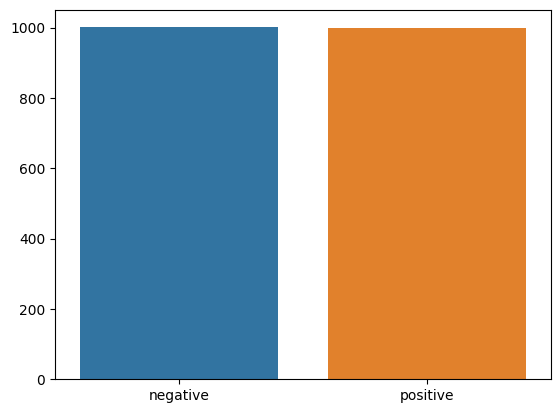

In [ ]:
sns.barplot(x=np.array(['negative','positive']),y=dd.values)
plt.show()


We observe that the output labels are evenly distributed.

## Tweet Text Deep CLeaning





Sentiment is primarily conveyed through lexical and punctuation cues in text, and in online conversations, emoticons serve as visual representations of emotions, aligning with our focus. Therefore, syntactic relationships and semantic word features play a less significant role.

In this section, we perform a comprehensive text cleaning process, which includes the removal of emojis, punctuation, stop words, links, mentions, and newline characters. This deep cleaning is essential to prepare the tweets for meaningful analysis by eliminating irrelevant or noisy elements that could impact the accuracy and clarity of the results.

In [52]:
df['Label']=df['Label'].apply(str)
df['tweets_final']=df['tweets_final'].apply(str)

Stop words are the common words that do not carry significant meaning and can potentially introduce noise into the results. So we will remove them

As the NLTK library does not include stop words for the Malayalam language, we have manually curated a list of stop words specific to Malayalam text processing.

In [53]:
stopwords =['അതു', 'ഇതു', 'ആ', 'അതിന്', 'എങ്ങനെ', 'എങ്ങും', 'എന്നു', 'എന്നും', 'ഇതിൽ', 'അവൻ', 'ഇവൻ', 'അതാണ്', 'ഇവനും', 'അവൾ', 'ഇവൾ', 'അവരുടെ', 'ആണ്', 'ഉണ്ട്', 'അതിനാൽ', 'ഇവര്', 'ആയി', 'ഇന്നു', 'ഇവിടെ', 'ഇല്ല', 'ആണ്\u200c', 'ആരും', 'ഇല്ലാതെ', 'ഇന്നലെ', 'ആയാലും', 'ഇനിയും', 'ആകുന്ന', 'ആണോ', 'ആകുന്നു', 'ഏത്', 'എന്തിന്റെ ', 'ഇത്ര', 'ഏറെ', 'ഇതേ', 'എന്ന', 'വേറെ', 'എല്ലാ ', 'നിങ്ങളെ', 'വളരെ ', 'എവിടെ', 'എപ്പോൾ', 'ഇന്ന്', 'ഉള്ള ', 'മറ്റു ', 'ഈ', 'ഇത്', 'പോലെ', 'തന്റെ', 'വരെ', 'മാത്രം ', 'എന്നാൽ', 'മുമ്പ്', 'ഇനി', 'എങ്കിൽ', 'അല്ലെങ്കിൽ', 'കുറിച്ചു ', 'പിന്നെ ', 'എന്നത് ', 'അന്ന്', 'എന്ത്']

In [54]:
# Function to Remove emojis,punctuations, stopwords, links, mentions and new line characters
# Clean emojis from text
def strip_emoji(text):
    emojiFound=0
    if('❤' in text):
       emojiFound=1
    replace_Text=emoji.replace_emoji(text, replace="")
    if(emojiFound==1):
       replace_Text=emoji.replace_emoji(replace_Text, replace="")
    return replace_Text

def strip_all_entities(text):
     text = re.sub(r'\r|\n', ' ', text.lower())  # Replace newline and carriage return with space, and convert to lowercase
     text = re.sub(r"(?:\@|https?\://)\S+", "", text)  # Remove links and mentions
     text = re.sub(r'“|”|[a-zA-Z]|\u200d', "", text)  # Remove character
     text = ' '.join(word for word in text.split() if word not in stopwords)
     return text

def remove_punctuation(text):
    # Make a translation table that maps all punctuation characters to None
    translator = str.maketrans("", "", string.punctuation)
    # Apply the translation table to the input string
    result = text.translate(translator)
    return result

def clean_hashtags(tweet):
    # Remove hashtags at the end of the sentence
    new_tweet = re.sub(r'(\s+#[\w-]+)+\s*$', '', tweet).strip()
    # Remove the # symbol from hashtags in the middle of the sentence
    new_tweet = re.sub(r'#([\w-]+)', r'\1', new_tweet).strip()
    return new_tweet

# Filter special characters such as & and $ present in some words
def filter_chars(text):
    return ' '.join('' if ('$' in word) or ('&' in word) else word for word in text.split())

# Remove multiple spaces
def remove_mult_spaces(text):
    return re.sub(r"\s\s+", " ", text)

def filter_english(text):
    try:
        lang = detect(text)
    except LangDetectException:
        lang = "unknown"
    return text if lang == "ml" else ""

# Expand contractions
def expand_contractions(text):
    return contractions.fix(text)

# Remove numbers
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_punctuation(input_string):
    # Make a translation table that maps all punctuation characters to None
    translator = str.maketrans("", "", string.punctuation)

    # Apply the translation table to the input string
    result = input_string.translate(translator)

    return result

# Remove repeated punctuation
def remove_repeated_punctuation(text):
    return re.sub(r'[\?\.\!]+(?=[\?\.\!])', '', text)

# Remove extra whitespace
def remove_extra_whitespace(text):
    return ' '.join(text.split())

def remove_url_shorteners(text):
    return re.sub(r'(?:http[s]?://)?(?:www\.)?(?:bit\.ly|goo\.gl|t\.co|tinyurl\.com|tr\.im|is\.gd|cli\.gs|u\.nu|url\.ie|tiny\.cc|alturl\.com|ow\.ly|bit\.do|adoro\.to)\S+', '', text)

# Remove spaces at the beginning and end of the tweet
def remove_spaces_tweets(tweet):
    return tweet.strip()


# Function to call all the cleaning functions in the correct order
def clean_tweet(tweet):
    tweet = strip_emoji(tweet)
    tweet = clean_hashtags(tweet)
    tweet = filter_chars(tweet)
    tweet = filter_english(tweet)
    tweet = strip_all_entities(tweet)
    tweet = remove_punctuation(tweet)
    tweet = remove_mult_spaces(tweet)
    tweet = expand_contractions(tweet)
    tweet = remove_numbers(tweet)
    tweet = remove_repeated_punctuation(tweet)
    tweet = remove_extra_whitespace(tweet)
    tweet = remove_url_shorteners(tweet)
    tweet = remove_spaces_tweets(tweet)

    tweet = ' '.join(tweet.split())  # Remove multiple spaces between words
    return tweet

In [55]:
#Performing code clean up
df['text_clean'] = None
df['text_clean'] = [clean_tweet(tweet) for tweet in df['tweets_final']]

We have removed all noises from the data

### Tweets length analysis

In [56]:
df['text_len'] = [len(text.split()) for text in df.text_clean]

In [57]:
df_sorted = df.sort_values(by='text_len', ascending=False)
df_sorted

,Label,tweets_final,text_clean,text_len
1068,n,ഇന്നലെ പതിനൊന്ന് മണിക്ക് പൂജയും കഴിഞ്ഞു വന്ന ആളിന്റെ കയ്യിൽ കേക്ക് ഉണ്ടായിരുന്നു പിന്നെ പെട്ടന്ന...,പതിനൊന്ന് മണിക്ക് പൂജയും കഴിഞ്ഞു വന്ന ആളിന്റെ കയ്യിൽ കേക്ക് ഉണ്ടായിരുന്നു പിന്നെ പെട്ടന്ന് ഡെക്ക...,33
1843,n,"ഇസ്ലാം, ക്രിസ്തു മതങ്ങളേക്കാൾ മോശം മതമാണ് ഹിന്ദു മതം, കാരണം മേൽ ജാതി-കീഴ് ജാതി വേർതിരിവ്, എന്റെ ...",ഇസ്ലാം ക്രിസ്തു മതങ്ങളേക്കാൾ മോശം മതമാണ് ഹിന്ദു മതം കാരണം മേൽ ജാതികീഴ് ജാതി വേർതിരിവ് എന്റെ വീട്...,32
50,p,ആർക്കെങ്കിലും ജോലി കിട്ടിയെന്ന് അറിഞ്ഞാൽ എനിക്കും ഭയങ്കര സന്തോഷം ആണ്. അത്രക്ക് അടുത്ത് അറിയുന്ന ...,ആർക്കെങ്കിലും ജോലി കിട്ടിയെന്ന് അറിഞ്ഞാൽ എനിക്കും ഭയങ്കര സന്തോഷം ആണ് അത്രക്ക് അടുത്ത് അറിയുന്ന ആ...,32
41,p,"ഒഒരു സന്തോഷം നിങ്ങളെ അറിക്കാനുണ്ട് ,എന്റെ കുഞ്ഞമ്മയുടെ മകൻ എന്റെ സഹോദരൻ അതുൽ ഹേമ, ആർമി മെഡിക്കൽ ...",ഒഒരു സന്തോഷം അറിക്കാനുണ്ട് എന്റെ കുഞ്ഞമ്മയുടെ മകൻ എന്റെ സഹോദരൻ അതുൽ ഹേമ ആർമി മെഡിക്കൽ കോളേജ് ഡൽഹ...,31
1054,n,എസ്.എസ്.എൽ.സി പരീക്ഷയിൽ മുഴുവൻ വിഷയങ്ങൾക്ക് എപ്ലസ് നേടിയിട്ടും പ്ലസ് വണിന് സീറ്റ് ലഭിക്കാത്തതിൽ ...,എസ്എസ്എൽസി പരീക്ഷയിൽ മുഴുവൻ വിഷയങ്ങൾക്ക് എപ്ലസ് നേടിയിട്ടും പ്ലസ് വണിന് സീറ്റ് ലഭിക്കാത്തതിൽ മനം...,31
...,...,...,...,...
866,p,അടിപൊളി,അടിപൊളി,1
85,p,ഇഷ്ടം,ഇഷ്ടം,1
158,p,ഗംഭീരം,ഗംഭീരം,1
1240,n,നഷ്ടപ്പെട്ടു,നഷ്ടപ്പെട്ടു,1


In [58]:
max_len = np.max(df['text_len'])
max_len

33

The maximum length of tweet before preprocessing is 33

**Visualise Tweets length**

In this section, we will attempt to visualize the frequency of tweets containing fewer than 10 words.

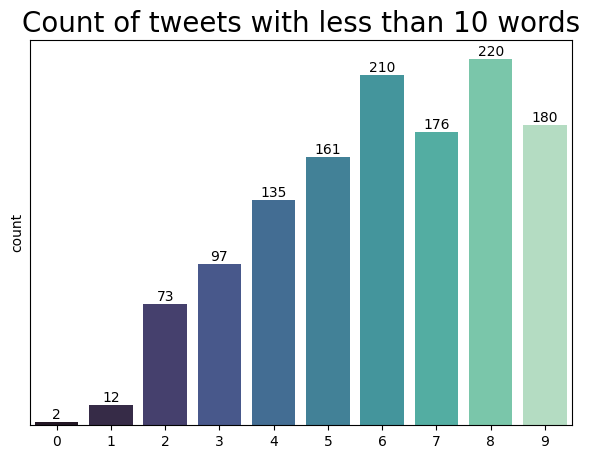

In [27]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df[df['text_len']<10], palette='mako')
plt.title('Count of tweets with less than 10 words', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

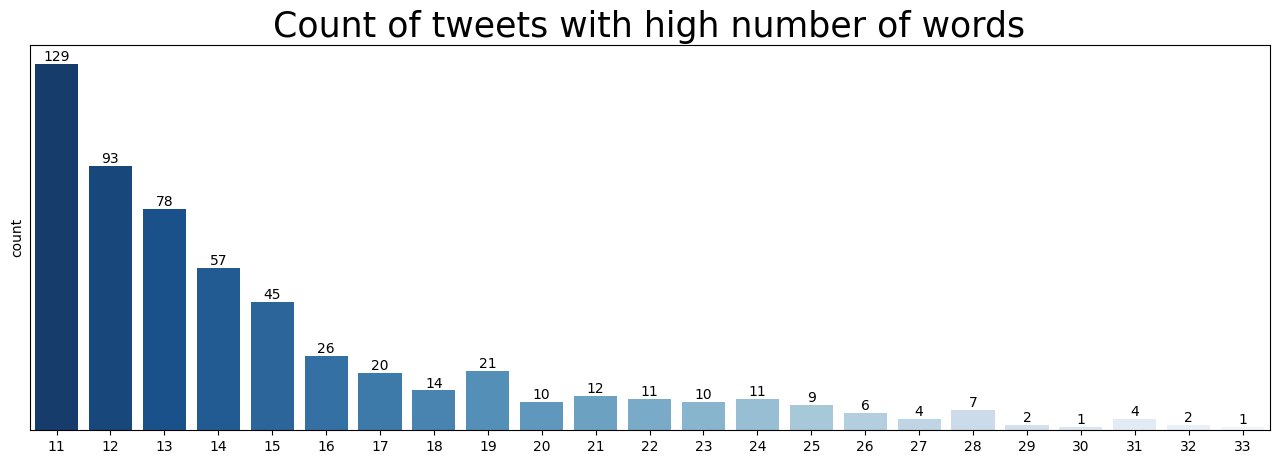

In [28]:
plt.figure(figsize=(16,5))
ax = sns.countplot(x='text_len', data=df[(df['text_len']<=1000) & (df['text_len']>10)], palette='Blues_r')
plt.title('Count of tweets with high number of words', fontsize=25)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

## Word Cloud

Here we will try to plot the most frequently used words from positive and negative tweets

In [59]:

def generate_wordcloud(text):
  #Filter Positive and Negative tweets
  positive=df[df['Label']=='p']
  negative=df[df['Label']=='n']

  #Filter top 70 most frequent word
  corpus_p = [word for text in positive['text_clean'] for word in text.split()]
  count_words_p = Counter(corpus_p)
  sorted_words_p = count_words_p.most_common()
  top_25_words_p = dict(sorted_words_p[:70])

  corpus_n = [word for text in negative['text_clean'] for word in text.split()]
  count_words_n = Counter(corpus_n)
  sorted_words_n = count_words_n.most_common()
  top_25_words_n = dict(sorted_words_n[:70])

  #Generate WordCloud
  text = str(positive[:10]['text_clean'].values)
  font_path = "/content/drive/My Drive/Aneesha/NotoSansMalayalam-VariableFont.ttf"
  wordcloud_positive = WordCloud(
                          max_words=1000,
                          max_font_size=40,
                          random_state=42, font_path=font_path
                         ).generate_from_frequencies(top_25_words_p)


  wordcloud_negative = WordCloud(
                          max_words=1000,
                          max_font_size=40,
                          random_state=42, font_path=font_path,colormap='Set2', collocations=False
                         ).generate_from_frequencies(top_25_words_n)
  plt.figure(figsize = (20,20))
  plt.subplot(1, 2, 1)
  plt.imshow(wordcloud_positive)
  plt.axis('off')
  plt.text(0.5, 1.05, 'Positive Words', fontsize=18, ha='center', va='center', transform=plt.gca().transAxes)

  plt.subplot(1, 2, 2)
  plt.imshow(wordcloud_negative)
  plt.axis('off')
  plt.text(0.5, 1.05, 'Negative Words', fontsize=18, ha='center', va='center', transform=plt.gca().transAxes)

  plt.show()

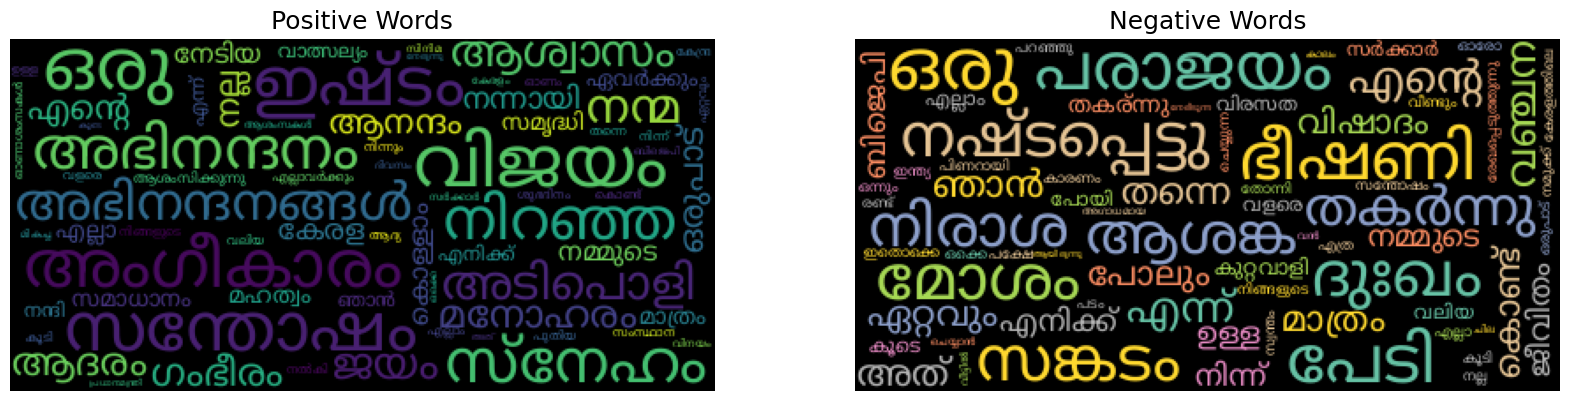

In [30]:
generate_wordcloud(df['text_clean'])

We will remove the columns that are generated for analysis

In [61]:
df = df.drop('tweets_final', axis=1)

In [62]:
df = df.drop('text_len', axis=1)

In [63]:
df.columns

Index(['Label', 'text_clean'], dtype='object')

# Model Building


In this section, we will explore the development of deep learning models, such as LSTM (Long Short-Term Memory) networks, as well as leveraging pretrained model like BERT to enhance the performance of our text analysis tasks.

**Sentiment column encoding**


Our categories are either "positive" or "negative." In order to make them compatible with our network, we must change them into the numbers 0 and 1.



In [64]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the 'label' column and transform it
df['Label'] = label_encoder.fit_transform(df['Label'])

In [65]:
df.shape

(2000, 2)

**Shuffle the data**

We will shuffle the data to ensure that it is randomly ordered during training.

In [66]:
df=df.sample(frac=1.0, random_state=seed_value)


## **LSTM**

Long Short-Term Memory (LSTM) networks are a type of recurrent neural network (RNN) architecture that excel at capturing long-range dependencies in sequential data. They are particularly significant in sentiment analysis, as LSTMs can effectively model the contextual relationships between words in text, enabling accurate sentiment classification by considering the entire context of a sentence or document.

The architecture of LSTM model used in our sentiment analysis is described below

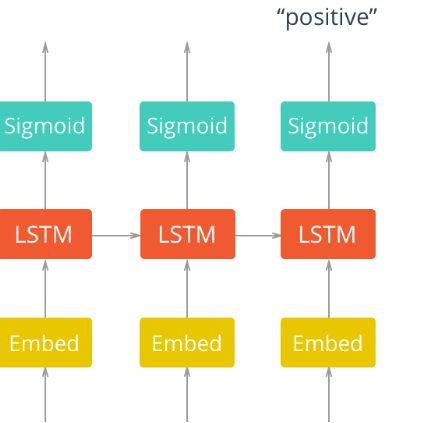

Figure shows the architecture of LSTM model

**First**, we will feed words into an embedding layer. The reason for introducing this embedding layer is due to the relatively smaller vocabulary size. One-hot encoding for a large number of classes is highly inefficient. Instead, we employ an embedding layer, effectively treating it as a lookup table. While you could train this layer using methods like Word2Vec and then import it, it is also acceptable to create a new layer solely for dimensionality reduction and let the network adaptively learn the weights.

**After** the input words have been processed through the embedding layer, the resulting embeddings will be directed to LSTM cells. These LSTM cells introduce recurrent connections to the network, enabling it to capture information about the word sequence in the movie review data.

**Lastly**, the LSTM outputs will be passed through a sigmoid output layer. We choose the sigmoid function because it maps positive and negative sentiment to 1 and 0, respectively. Consequently, the sigmoid will produce predicted sentiment values within the range of 0 to 1.

### Train - Test split

Now we need to split the dataset into a train and test sets .


In [67]:
X = df['text_clean'].values
y = df['Label'].values

In [68]:
df.shape

(2000, 2)

We will start by dividing the dataset into two parts: a training set and a test set. Initially, we'll split it so that 80% goes into the training set and 20% goes into the test set. Then, we'll further divide the training set into a smaller portion, which will become the validation set.

In [69]:
#split to train and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed_value)
print(f'shape of train data is {x_train.shape}')
print(f'shape of test data is {x_test.shape}')

shape of train data is (1600,)
shape of test data is (400,)


### Train - Validation split


Additionally, we will divide the training set into two parts: one for training the model and the other for validation.

In [70]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=seed_value)

In [71]:
print(f'shape of validation data is {x_train.shape}')
print(f'shape of test data is {x_valid.shape}')

shape of validation data is (1280,)
shape of test data is (320,)


### Tokenization

Before we can use words in our network, we need to turn them into numbers. This is called tokenization. To do this, we create a dictionary that matches words to unique numbers. Then, we change each review into a series of these numbers, making it ready for the network.

We'll create a dictionary that connects words to numbers, starting from 1, not 0. Afterward, we'll change the reviews into these numbers and keep them in a new list

In [72]:
def tockenize(x_train,x_test,x_val):
    word_list = []
    for sent in x_train:
        for word in sent.split():
          if word not in stopwords and word != '':
            word_list.append(word)

    corpus = Counter(word_list)
    # sorting on the basis of most common words
    corpus_ = sorted(corpus,key=corpus.get,reverse=True)
    # creating a dict
    onehot_dict = {w:i+1 for i,w in enumerate(corpus_)}

    # tockenize
    final_list_train,final_list_test,final_list_valid = [],[],[]
    for sent in x_train:
            final_list_train.append([onehot_dict[word] for word in sent.split()
                                     if word in onehot_dict.keys()])
    for sent in x_test:
            final_list_test.append([onehot_dict[word] for word in sent.split()
                                    if word in onehot_dict.keys()])
    for sent in x_valid:
            final_list_valid.append([onehot_dict[word] for word in sent.split()
                                    if word in onehot_dict.keys()])

    return np.array(final_list_train),np.array(final_list_test),np.array(final_list_valid),onehot_dict

Creating vocabulary dictionary

In [73]:
vocab=None
x_train,x_test,x_valid,vocab = tockenize(x_train,x_test,x_valid)

In [74]:
print(f'Length of vocabulary is {len(vocab)}')

Length of vocabulary is 6731


Analysing review length

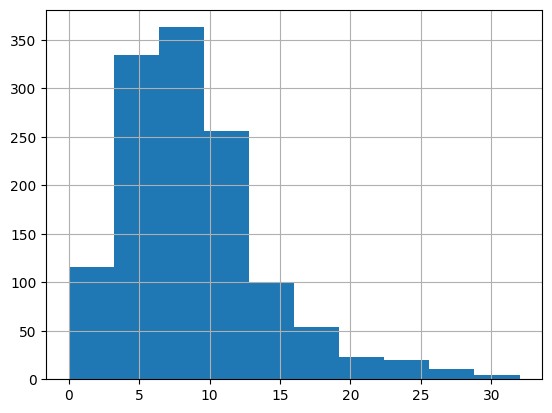

count    1280.000000
mean        8.899219
std         4.928892
min         0.000000
25%         6.000000
50%         8.000000
75%        11.000000
max        32.000000
dtype: float64

In [75]:
rev_len = [len(i) for i in x_train]
pd.Series(rev_len).hist()
plt.show()
pd.Series(rev_len).describe()

**Padding**


To handle reviews of different lengths, we will adjust all our reviews to be the same length by adding extra content if needed.

we will pad each of the sequence to max length of 33 as we have found in earlier step

In [76]:
def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

In [77]:
x_train_pad = padding_(x_train,33)
x_test_pad = padding_(x_test,33)
x_valid_pad = padding_(x_valid,33)

**Batching and loading as tensor**

Once we've prepared our training, test, and validation data, we can set up DataLoaders to work with this data. This involves two main steps:


1.   Organizing our data in a way that's simple to handle. We use a tool called TensorDataset for this purpose. It arranges our input information and the expected results in a way that they go together smoothly.
2.   Creating DataLoaders for our training, validation, and test datasets. This step helps us split our data into batches, making it more manageable for training and evaluation.

We have selected batch size of 10

In [78]:
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(x_train_pad), torch.from_numpy(y_train))
test_data = TensorDataset(torch.from_numpy(x_test_pad), torch.from_numpy(y_test))
valid_data = TensorDataset(torch.from_numpy(x_valid_pad), torch.from_numpy(y_valid))

# dataloaders
batch_size = 10

# SHUFFLE the data
train_loader = DataLoader(train_data, shuffle=False, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size, drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=False, batch_size=batch_size, drop_last=True)

In [79]:
# Test the  implementation!
# Iterate over the batches
for batch_x, batch_y in train_loader:
    # Print the size and content of the current batch
    print('Sample input size: ', batch_x.size())  # batch_size, seq_length
    print('Sample input: \n', batch_x)
    print('Sample labels: \n', batch_y)
    break  # To print only the first batch, you can remove this line if you want all batches


Sample input size:  torch.Size([10, 33])
Sample input: 
 tensor([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,  575,    8,   25, 1277],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1278,
         1279, 1280, 1281,  576,  577,  578,    3,  193,   64,   46, 1282, 1283,
          579,  249,   48, 1284,  194, 1285,  195,  111, 1286],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0, 1287, 1288, 1289, 1290,  196,
          250, 1291, 1292,  155,  251,  363, 1293, 1294,    4],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0, 1295, 1296,    7,  580,  364],
        [   0,    0,    0,    0,    0, 

**Defining Model**

In [80]:
torch.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value)

class SentimentLSTM(nn.Module):
    def __init__(self,no_layers,vocab_size,hidden_dim,embedding_dim,drop_prob=0.5):
        super(SentimentLSTM,self).__init__()

        self.output_dim = output_dim
        self.hidden_dim = hidden_dim

        self.no_layers = no_layers
        self.vocab_size = vocab_size

        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        #lstm
        self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
                           num_layers=no_layers, batch_first=True)


        # dropout layer
        self.dropout = nn.Dropout(0.3)

        # linear and sigmoid layer
        self.fc = nn.Linear(self.hidden_dim, output_dim)
        self.sig = nn.Sigmoid()

    def forward(self,x,hidden):
        batch_size = x.size(0)
        # embeddings and lstm_out
        embeds = self.embedding(x)  # shape: B x S x Feature   since batch = True
        #print(embeds.shape)  #[50, 500, 1000]
        lstm_out, hidden = self.lstm(embeds, hidden)

        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)

        # dropout and fully connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)

        # sigmoid function
        sig_out = self.sig(out)

        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)

        sig_out = sig_out[:, -1] # get last batch of labels

        # return last sigmoid output and hidden state
        return sig_out, hidden



    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        h0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        hidden = (h0,c0)
        return hidden


**Instantiate the network**

In [81]:
no_layers = 2
vocab_size = len(vocab) + 1 #extra 1 for padding
embedding_dim = 200
output_dim = 1
hidden_dim = 400

model = SentimentLSTM(no_layers,vocab_size,hidden_dim,embedding_dim,drop_prob=0.5)

#moving to gpu
model.to(device)

print(model)

SentimentLSTM(
  (embedding): Embedding(6732, 200)
  (lstm): LSTM(200, 400, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=400, out_features=1, bias=True)
  (sig): Sigmoid()
)


**Training**

In [82]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

In [83]:
clip = 5
epochs = 5
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]


for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model.train()
    # initialize hidden state
    h = model.init_hidden(batch_size)
    for inputs, labels in train_loader:

        inputs, labels = inputs.to(device), labels.to(device)
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        model.zero_grad()
        output,h = model(inputs,h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()



    val_h = model.init_hidden(batch_size)
    val_losses = []
    val_acc = 0.0
    model.eval()
    for inputs, labels in valid_loader:
            val_h = tuple([each.data for each in val_h])

            inputs, labels = inputs.to(device), labels.to(device)

            output, val_h = model(inputs, val_h)
            val_loss = criterion(output.squeeze(), labels.float())

            val_losses.append(val_loss.item())

            accuracy = acc(output,labels)
            val_acc += accuracy

    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}')
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        torch.save(model.state_dict(), '/content/drive/My Drive/Aneesha/state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')


Epoch 1
train_loss : 0.47351316176354885 val_loss : 0.27559896605089307
train_accuracy : 78.59375 val_accuracy : 90.625
Validation loss decreased (inf --> 0.275599).  Saving model ...
Epoch 2
train_loss : 0.13940416020341218 val_loss : 0.19816525325586554
train_accuracy : 95.234375 val_accuracy : 91.875
Validation loss decreased (0.275599 --> 0.198165).  Saving model ...
Epoch 3
train_loss : 0.06706409139223979 val_loss : 0.21379281686677132
train_accuracy : 97.890625 val_accuracy : 92.8125
Epoch 4
train_loss : 0.03731349182498889 val_loss : 0.2216602897078701
train_accuracy : 98.828125 val_accuracy : 93.125
Epoch 5
train_loss : 0.014525862442042126 val_loss : 0.20265300415940146
train_accuracy : 99.6875 val_accuracy : 95.0


**Ploting Accuracy and Loss**

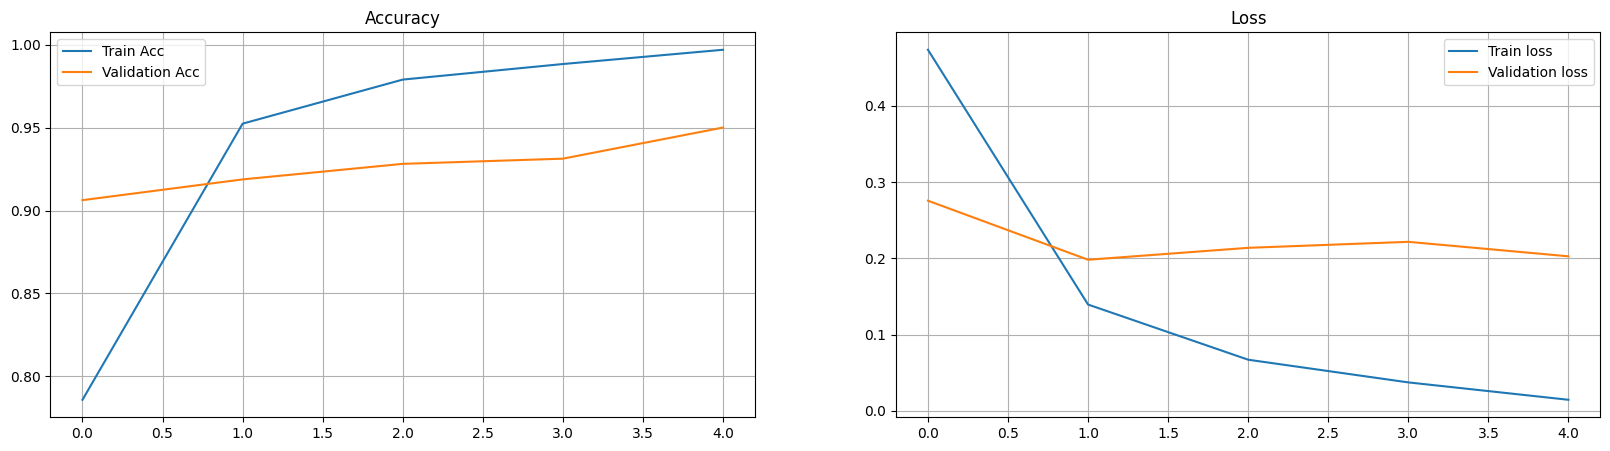

In [84]:
plt.style.use('default')
fig = plt.figure(figsize = (20,5))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid(True)

plt.show()

**Test Predictions**

In [85]:
def predict_text(text):
        word_seq = np.array([vocab[clean_tweet(word)] for word in text.split()
                         if clean_tweet(word) in vocab.keys()])
        word_seq = np.expand_dims(word_seq,axis=0)
        pad =  torch.from_numpy(padding_(word_seq,500))
        inputs = pad.to(device)
        batch_size = 1
        h = model.init_hidden(batch_size)
        h = tuple([each.data for each in h])
        output, h = model(inputs, h)
        return(output.item())

In [86]:
def evaluate_model(model, test_loader):
  test_losses = [] # track loss
  num_correct = 0

  # Initialize lists to collect predictions and ground truth labels
  y_pred_list = []
  y_test_list = []

    # init hidden state
  h = model.init_hidden(batch_size)
  train_on_gpu = torch.cuda.is_available()

  model.eval()
  # iterate over test data
  for inputs, labels in test_loader:

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()


        output, h = model(inputs, h)

        # calculate loss
        test_loss = criterion(output.squeeze(), labels.float())
        test_losses.append(test_loss.item())

        # convert output probabilities to predicted class (0 or 1)
        pred = torch.round(output.squeeze())  # rounds to the nearest integer

        # compare predictions to true label
        correct_tensor = pred.eq(labels.float().view_as(pred))
        correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
        num_correct += np.sum(correct)
        # Append predictions and ground truth labels to the lists
        y_pred_list.extend(pred.cpu().detach().numpy())
        y_test_list.extend(labels.cpu().detach().numpy())

    # -- stats! -- ##
    # avg test loss
  print("Test loss: {:.3f}".format(np.mean(test_losses)))

    # accuracy over all test data
  test_acc = num_correct/len(test_loader.dataset)
  print("Test accuracy: {:.3f}".format(test_acc))
  return y_pred_list, y_test_list

y_pred_list, y_test_list = evaluate_model(model, test_loader)

Test loss: 0.259
Test accuracy: 0.930


**Confusion Matrix**

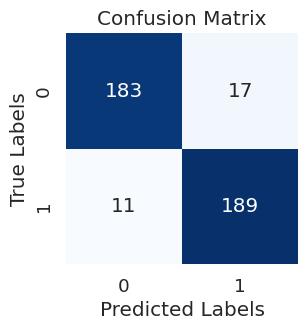

Classification Report for LSTM :
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       200
           1       0.92      0.94      0.93       200

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



In [87]:
conf_matrix = confusion_matrix(y_test_list, y_pred_list)

# Generate a heatmap of the confusion matrix
plt.figure(figsize=(3, 3))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print('Classification Report for LSTM :\n', classification_report(y_test_list, y_pred_list))

**Predicting on external data**

Here we will making predictions using data from an external source.

In [88]:

index = 1480
print(df['text_clean'][index])
print('='*70)
print(f'Actual sentiment is  : {df["Label"][index]}')
print('='*70)
pro = predict_text(df['text_clean'][index])
status = "positive" if pro > 0.5 else "negative"
pro = (1 - pro) if status == "negative" else pro
print(f'Predicted sentiment is {status} with a probability of {pro}')

സാമ്പത്തികം നേത്രചികിത്സക്ക് തടസ്സമാകുവാണോ ആശങ്ക
Actual sentiment is  : 0
Predicted sentiment is negative with a probability of 0.9997661744855577


## Transfer Learning using Transformers - BERT Model

BERT, an open-source natural language processing (NLP) framework, aims to assist computers in comprehending contextually ambiguous text by leveraging information from nearby words. It underwent pre-training using Wikipedia text and can undergo further customization through question and answer datasets. BERT, an abbreviation for Bidirectional Encoder Representations from Transformers, is built upon the Transformers architecture, a deep learning model that establishes connections between every input and output element with dynamically calculated weightings, referred to as attention, within the field of NLP.

**Train - Validation - Test split**

In [ ]:
x = df['text_clean'].values
y = df['Label'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=seed_value)
print(f'shape of train data is {x_train.shape}')
print(f'shape of test data is {x_test.shape}')

shape of train data is (1600,)
shape of test data is (400,)


In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=seed_value)

**BERT Tokenization**

We make use of a pretrained tokenizer model for BERT that is trained with Malayalam texts, known as the "bert-base-multilingual-uncased". This multilingual base model will allow us to token Malayalam sentences with ease.

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')

In [ ]:
def bert_tokenizer(data):
    input_ids = []
    attention_masks = []
    for sent in data:
        encoded_sent = tokenizer.encode_plus(
            text=sent,
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]` special tokens
            max_length=MAX_LEN,             # Choose max length to truncate/pad
            pad_to_max_length=True,         # Pad sentence to max length
            return_attention_mask=True      # Return attention mask
            )
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

To determine the maximum tokenized sentence length, we employ the "encode" method of the original BERT tokenizer on the training tweets and assess the length of the longest sentence.

In [ ]:
# Tokenize train tweets
encoded_tweets = [tokenizer.encode(sent, add_special_tokens=True) for sent in x_train]

# Find the longest tokenized tweet
max_len = max([len(sent) for sent in encoded_tweets])
print('Max length: ', max_len)

Max length:  136


In [ ]:
MAX_LEN = 140

Then we can tokenize the train, validation and test tweets using the custom define tokenizer.

In [ ]:
train_inputs, train_masks = bert_tokenizer(x_train)
val_inputs, val_masks = bert_tokenizer(x_valid)
test_inputs, test_masks = bert_tokenizer(x_test)

As we are utilizing the PyTorch-based BERT model, it is necessary to transform the arrays into PyTorch tensors and establish data loaders for our dataset.

In [ ]:
# Convert target columns to pytorch tensors format
train_labels = torch.from_numpy(y_train)
val_labels = torch.from_numpy(y_valid)
test_labels = torch.from_numpy(y_test)

Assigning batch size

In [ ]:
batch_size = 8

**Creating Dataloaders for training and validation sets**

In [ ]:
# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

# Create the DataLoader for our test set
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

**Training**

In [ ]:
class Bert_Classifier(nn.Module):
    def __init__(self, freeze_bert=False):
        super(Bert_Classifier, self).__init__()
        # Specify hidden size of BERT, hidden size of the classifier, and number of labels
        n_input = 768
        n_hidden = 50
        n_output = 5

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained("bert-base-multilingual-uncased")
        # Instantiate the classifier (a fully connected layer followed by a ReLU activation and another fully connected layer)
        self.classifier = nn.Sequential(
            nn.Linear(n_input, n_hidden),
            nn.ReLU(),
            nn.Linear(n_hidden, n_output)
        )

        # Freeze the BERT model weights if freeze_bert is True (useful for feature extraction without fine-tuning)
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        # Feed input data (input_ids and attention_mask) to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)

        # Extract the last hidden state of the `[CLS]` token from the BERT output (useful for classification tasks)
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed the extracted hidden state to the classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

Furthermore, in order to create a custom learning rate scheduler, we define the "initialize_model" function as shown below.

In [ ]:
# Function for initializing the BERT Classifier model, optimizer, and learning rate scheduler
def initialize_model(epochs=4):
    # Instantiate Bert Classifier
    bert_classifier = Bert_Classifier(freeze_bert=False)

    bert_classifier.to(device)

    # Set up optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=3e-5,    # learning rate, set to default value
                      eps=1e-8    # decay, set to default value
                      )

    # Calculate total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Define the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)

    return bert_classifier, optimizer, scheduler

We indicate the utilization of the GPU when available, which is strongly advised for the fine-tuning process.

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
EPOCHS=5

Next, we initiate the BERT model by invoking the "initialize_model" function that we have defined.

In [ ]:
bert_classifier, optimizer, scheduler = initialize_model(epochs=EPOCHS)

**BERT Training**

In [ ]:
# Define Cross entropy Loss function for the multiclass classification task
loss_fn = nn.CrossEntropyLoss()

def bert_train(model, train_dataloader, val_dataloader=None, epochs=10, evaluation=False):

    print("Start training...\n")
    for epoch_i in range(epochs):
        print("-"*10)
        print("Epoch : {}".format(epoch_i+1))
        print("-"*10)
        print("-"*38)
        print(f"{'BATCH NO.':^7} | {'TRAIN LOSS':^12} | {'ELAPSED (s)':^9}")
        print("-"*38)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        ###TRAINING###

        # Put the model into the training mode
        model.train()

        for step, batch in enumerate(train_dataloader):
            batch_counts +=1

            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass and get logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update model parameters:
            # fine tune BERT params and train additional dense layers
            optimizer.step()
            # update learning rate
            scheduler.step()

            # Print the loss values and time elapsed for every 100 batches
            if (step % 100 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                print(f"{step:^9} | {batch_loss / batch_counts:^12.6f} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        ###EVALUATION###

        # Put the model into the evaluation mode
        model.eval()

        train_accuracy = []
        train_loss = []

        for batch in train_dataloader:
            batch_input_ids, batch_attention_mask, batch_labels = tuple(t.to(device) for t in batch)

            # We do not want to update the params during the evaluation,
            # So we specify that we dont want to compute the gradients of the tensors
            # by calling the torch.no_grad() method
            with torch.no_grad():
                logits = model(batch_input_ids, batch_attention_mask)

            loss = loss_fn(logits, batch_labels)

            train_loss.append(loss.item())

            # Get the predictions starting from the logits (get index of highest logit)
            preds = torch.argmax(logits, dim=1).flatten()

            # Calculate the train accuracy
            accuracy = (preds == batch_labels).cpu().numpy().mean() * 100
            train_accuracy.append(accuracy)

        # Compute the average accuracy and loss over the validation set
        train_loss = np.mean(train_loss)
        train_accuracy = np.mean(train_accuracy)

        # Define empty lists to host accuracy and validation for each batch
        val_accuracy = []
        val_loss = []

        for batch in val_dataloader:
            batch_input_ids, batch_attention_mask, batch_labels = tuple(t.to(device) for t in batch)

            # We do not want to update the params during the evaluation,
            # So we specify that we dont want to compute the gradients of the tensors
            # by calling the torch.no_grad() method
            with torch.no_grad():
                logits = model(batch_input_ids, batch_attention_mask)

            loss = loss_fn(logits, batch_labels)

            val_loss.append(loss.item())

            # Get the predictions starting from the logits (get index of highest logit)
            preds = torch.argmax(logits, dim=1).flatten()

            # Calculate the validation accuracy
            accuracy = (preds == batch_labels).cpu().numpy().mean() * 100
            val_accuracy.append(accuracy)


        # Compute the average accuracy and loss over the validation set
        val_loss = np.mean(val_loss)
        val_accuracy = np.mean(val_accuracy)


        # Print performance over the entire training data
        time_elapsed = time.time() - t0_epoch
        print("-"*61)
        print(f"{'AVG TRAIN LOSS':^12} | {'TRAIN LOSS':^10} | {'TRAIN ACCURACY (%)':^9} |{'VAL LOSS':^10} | {'VAL ACCURACY (%)':^9} | {'ELAPSED (s)':^9}")
        print("-"*61)
        print(f"{avg_train_loss:^14.6f} | {train_loss:^10.6f} | {train_accuracy:^17.2f} | {val_loss:^10.6f} | {val_accuracy:^17.2f} | {time_elapsed:^9.2f}")
        print("-"*61)
        print("\n")

    print("Training complete!")

In [ ]:
bert_train(bert_classifier, train_dataloader, val_dataloader, epochs=EPOCHS)

Start training...

----------
Epoch : 1
----------
--------------------------------------
BATCH NO. |  TRAIN LOSS  | ELAPSED (s)
--------------------------------------
   100    |   0.611726   |   24.81  
   159    |   0.253177   |   14.09  
-------------------------------------------------------------
AVG TRAIN LOSS | TRAIN LOSS | TRAIN ACCURACY (%) | VAL LOSS  | VAL ACCURACY (%) | ELAPSED (s)
-------------------------------------------------------------
   0.479511    |  0.136498  |       96.48       |  0.264592  |       94.06       |   53.19  
-------------------------------------------------------------


----------
Epoch : 2
----------
--------------------------------------
BATCH NO. |  TRAIN LOSS  | ELAPSED (s)
--------------------------------------
   100    |   0.167240   |   23.44  
   159    |   0.140313   |   13.83  
-------------------------------------------------------------
AVG TRAIN LOSS | TRAIN LOSS | TRAIN ACCURACY (%) | VAL LOSS  | VAL ACCURACY (%) | ELAPSED (s)
----

**Prediction**

In [ ]:
def bert_predict(model, test_dataloader):

    # Define empty list to host the predictions
    preds_list = []

    # Put the model into evaluation mode
    model.eval()

    for batch in test_dataloader:
        batch_input_ids, batch_attention_mask = tuple(t.to(device) for t in batch)[:2]

        # Avoid gradient calculation of tensors by using "no_grad()" method
        with torch.no_grad():
            logit = model(batch_input_ids, batch_attention_mask)

        # Get index of highest logit
        pred = torch.argmax(logit,dim=1).cpu().numpy()
        # Append predicted class to list
        preds_list.extend(pred)

    return preds_list

In [ ]:
bert_preds = bert_predict(bert_classifier, test_dataloader)

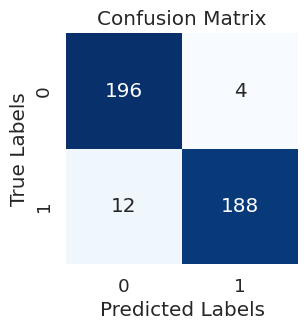

Classification Report for BERT :
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       200
           1       0.98      0.94      0.96       200

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



In [ ]:
conf_matrix = confusion_matrix(y_test, bert_preds)

# Generate a heatmap of the confusion matrix
plt.figure(figsize=(3, 3))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print('Classification Report for BERT :\n', classification_report(y_test, bert_preds))

# Conclusion

Concluding our sentiment analysis journey, we embarked on a quest using two powerful models, LSTM and BERT, to unravel the sentiments hidden within Malayalam tweets. LSTM exhibited impressive performance with a training accuracy of 99.685%, validation accuracy of 95%, and test accuracy of 93%. BERT, on the other hand, achieved even higher accuracy levels, boasting a training accuracy of 99.84%, validation accuracy of 97.5%, and test accuracy of 96%.  These results not only validate our efforts but also establish our models as leaders in the field of sentiment analysis for Malayalam tweets.

Future enhancements for this research could involve training on a larger and more diverse dataset, as well as exploring the use of pretrained word embeddings. Pretrained word embeddings specifically tailored to Malayalam are limited, which presents an opportunity for further research and development in this area. Additionally, stemming and lemmatization, although currently lacking adequate libraries for Malayalam, could be considered for future work. While our LSTM network demonstrated effective learning without these techniques, their inclusion in future enhancements could further enhance the accuracy and robustness of sentiment analysis for the morphological complexities of the Malayalam language.